In [1]:
import pandas as pd
import numpy as np
import os
forders = os.listdir('../data/서울_연립다세대_매매')
df_all_years = pd.DataFrame()
for i in range(1,len(forders)):
    path = '../data\\서울_연립다세대_매매\\'+forders[i]
    df= pd.read_csv(path, header=15,encoding='cp949') 
    df_all_years = pd.concat([df_all_years, df])
df_all_years = df_all_years.reset_index()
df = df_all_years.drop(['index'],axis=1)

In [2]:
df.head()

,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
0,서울특별시 강남구 개포동,170-18,170,18,(170-18),26.60,21.53,201007,13,"29,350",1,1988.0,선릉로12길 17,NaN
1,서울특별시 강남구 개포동,1219-11,1219,11,강남하이츠,39.90,19.33,201001,22,"21,500",1,1993.0,개포로20길 35,NaN
2,서울특별시 강남구 개포동,1202-2,1202,2,경모하이츠,51.69,21.20,201003,12,"28,500",1,1991.0,개포로22길 41-6,NaN
3,서울특별시 강남구 개포동,1235-16,1235,16,광현빌라,62.76,34.53,201001,22,"36,500",2,2001.0,논현로18길 10-13,NaN
4,서울특별시 강남구 개포동,1235-16,1235,16,광현빌라,77.34,42.55,201011,2,"44,200",4,2001.0,논현로18길 10-13,NaN


In [3]:
df.tail()

,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
493350,서울특별시 중랑구 중화동,86-9,86,9,화수분빌리지(105),55.58,27.57,202103,4,"17,000",2,2003.0,봉화산로21길 15,NaN
493351,서울특별시 중랑구 중화동,307-4,307,4,화인하우스(307-4),54.32,27.24,202102,17,"38,800",7,2017.0,동일로139가길 22,NaN
493352,서울특별시 중랑구 중화동,307-4,307,4,화인하우스(307-4),56.51,28.34,202102,19,"38,000",5,2017.0,동일로139가길 22,NaN
493353,서울특별시 중랑구 중화동,15-2,15,2,휴렉스빌,29.44,18.14,202104,6,"17,500",4,2016.0,봉화산로27다길 6,NaN
493354,서울특별시 중랑구 중화동,15-2,15,2,휴렉스빌,29.27,18.14,202106,8,"18,500",3,2016.0,봉화산로27다길 6,NaN


In [4]:
df.shape

(493355, 14)

In [5]:
df.columns

Index(['시군구', '번지', '본번', '부번', '건물명', '전용면적(㎡)', '대지권면적(㎡)', '계약년월', '계약일',
       '거래금액(만원)', '층', '건축년도', '도로명', '해제사유발생일'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493355 entries, 0 to 493354
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       493355 non-null  object 
 1   번지        493321 non-null  object 
 2   본번        493355 non-null  int64  
 3   부번        493355 non-null  int64  
 4   건물명       493355 non-null  object 
 5   전용면적(㎡)   493355 non-null  float64
 6   대지권면적(㎡)  493355 non-null  float64
 7   계약년월      493355 non-null  int64  
 8   계약일       493355 non-null  int64  
 9   거래금액(만원)  493355 non-null  object 
 10  층         493355 non-null  int64  
 11  건축년도      493334 non-null  float64
 12  도로명       493355 non-null  object 
 13  해제사유발생일   4464 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 52.7+ MB


In [7]:
df.describe()

,본번,부번,전용면적(㎡),대지권면적(㎡),계약년월,계약일,층,건축년도,해제사유발생일
count,493355.000000,493355.000000,493355.000000,4.933550e+05,493355.000000,493355.000000,493355.000000,493334.000000,4.464000e+03
mean,375.554613,63.627499,50.303811,3.664655e+03,201618.267244,15.881157,2.652879,2002.438520,2.020424e+07
std,355.953145,181.996633,21.606538,1.276003e+06,318.112506,8.817302,1.731315,10.885313,4.600196e+03
min,0.000000,0.000000,3.830000,3.030000e+00,201001.000000,1.000000,-3.000000,1925.000000,2.020022e+07
25%,121.000000,6.000000,36.882500,2.151000e+01,201405.000000,8.000000,2.000000,1993.000000,2.020072e+07
50%,296.000000,18.000000,48.200000,2.796000e+01,201610.000000,16.000000,3.000000,2002.000000,2.020102e+07
75%,523.000000,49.000000,59.850000,3.484000e+01,201905.000000,23.000000,4.000000,2012.000000,2.021030e+07
max,6053.000000,4813.000000,624.040000,4.481289e+08,202106.000000,31.000000,20.000000,2021.000000,2.021070e+07


C:\Users\wlgns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlgns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlgns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlgns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlgns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlgns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from c

MemoryError: Unable to allocate 9.90 GiB for an array with shape (1328197331,) and data type int64

C:\Users\wlgns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlgns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlgns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlgns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlgns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlgns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from c

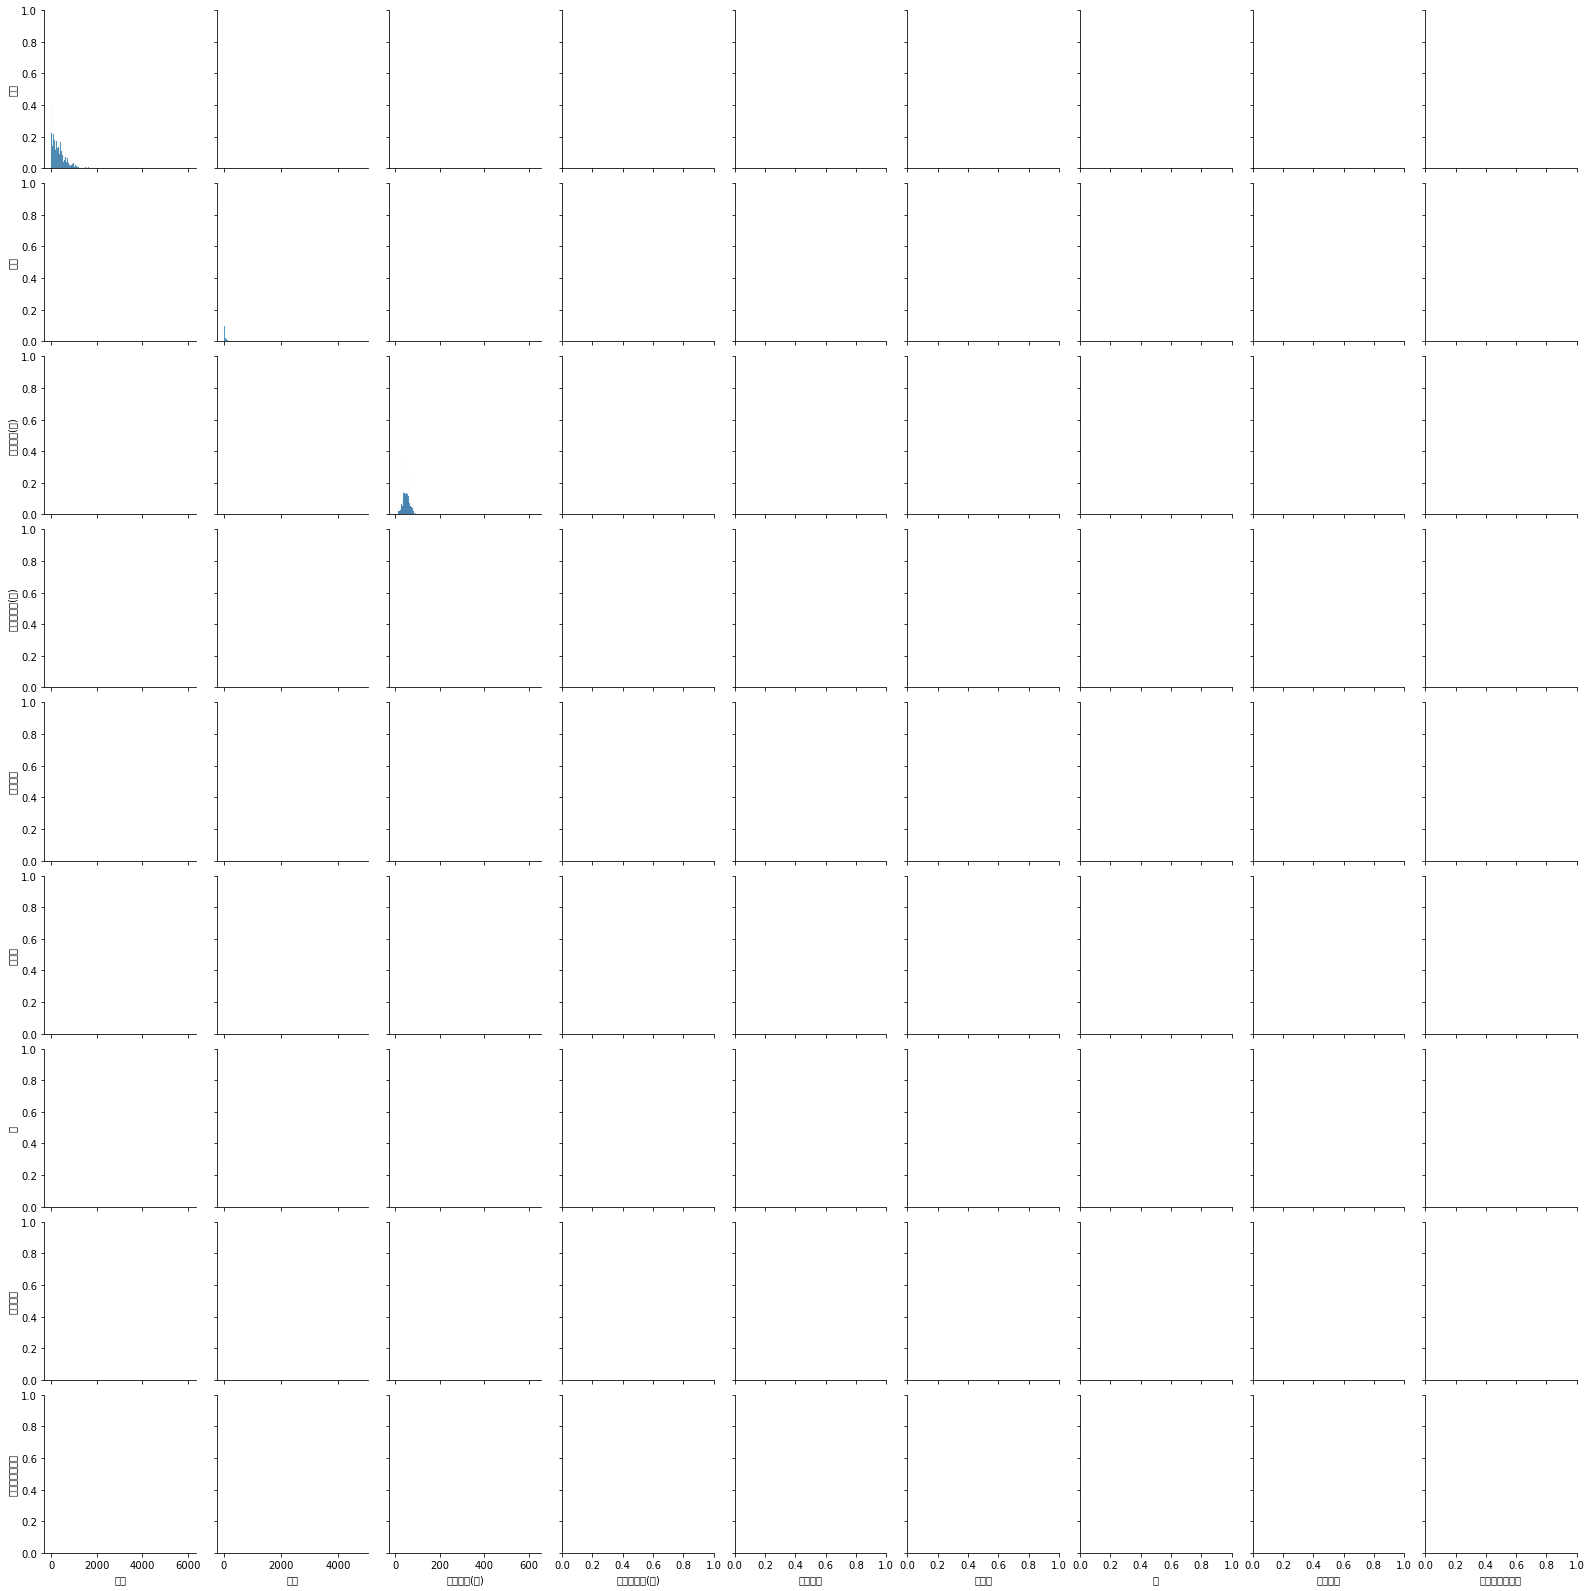

In [10]:
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
sns.pairplot(df)  
sns.pairplot(df, x_vars=['시군구','전용면적(㎡)','층','건축년도'], y_vars='거래금액(만원)' , size=7, aspect=0.7, kind='scatter')  